In [8]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(model, data):
    X, y = data.data, data.target

    # Divida os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Defina o intervalo de valores de k para testar
    k_values = range(1, len(data.feature_names) + 1)

    # Armazene os resultados da validação cruzada
    cv_scores = []

    # Teste diferentes valores de k
    for k in k_values:
        # Aplique a seleção de recursos
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X_train, y_train)

        # Crie um pipeline com a seleção de recursos e o modelo fornecido
        pipeline = Pipeline([('selector', selector), ('classifier', model)])

        # Calcule a pontuação de validação cruzada para o modelo atual
        score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
        cv_scores.append(score)

    # Identifique o melhor valor de k
    best_k = k_values[np.argmax(cv_scores)]
    print(f'O melhor valor de k é: {best_k}')

    # Plote a pontuação de validação cruzada em função de k
    plt.plot(k_values, cv_scores, marker='o')
    plt.xlabel('Número de características (k)')
    plt.ylabel('Acurácia')
    plt.title('Acurácia da validação cruzada vs. Número de características selecionadas')
    plt.show()

    # Crie um novo seletor com o número ótimo de características
    selector = SelectKBest(score_func=f_classif, k=best_k)
    X_selected_train = selector.fit_transform(X_train, y_train)
    X_selected_test = selector.transform(X_test)

    # Treine o modelo final usando o conjunto de treinamento completo
    pipeline = Pipeline([('selector', selector), ('classifier', model)])
    pipeline.fit(X_train, y_train)

    # Avalie o modelo final usando o conjunto de teste
    y_pred = pipeline.predict(X_test)
    print('Relatório de classificação (conjunto de teste):')
    print(classification_report(y_test, y_pred))

    # Mostre os índices das características selecionadas
    selected_features_idx = selector.get_support(indices=True)
    print("Índices das características selecionadas:")
    print(selected_features_idx)

    # Mostre os nomes das características selecionadas
    selected_features_names = np.array(data.feature_names)[selected_features_idx]
    print("Nomes das características selecionadas:")
    print(selected_features_names)
    
    return np.argmax(cv_scores)

Modelo: SVC (kernel='linear')
O melhor valor de k é: 28


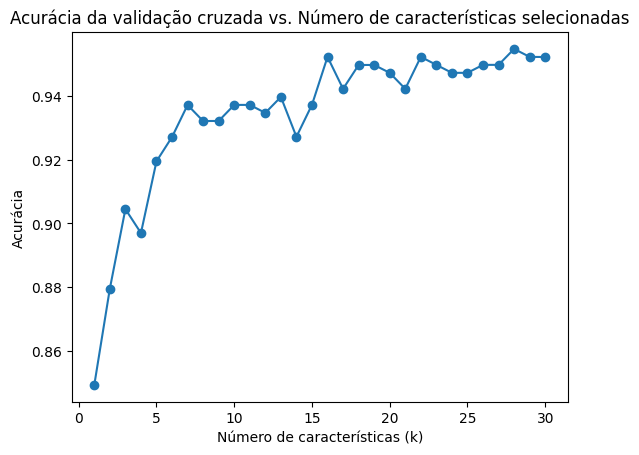

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Índices das características selecionadas:
[ 0  1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst con

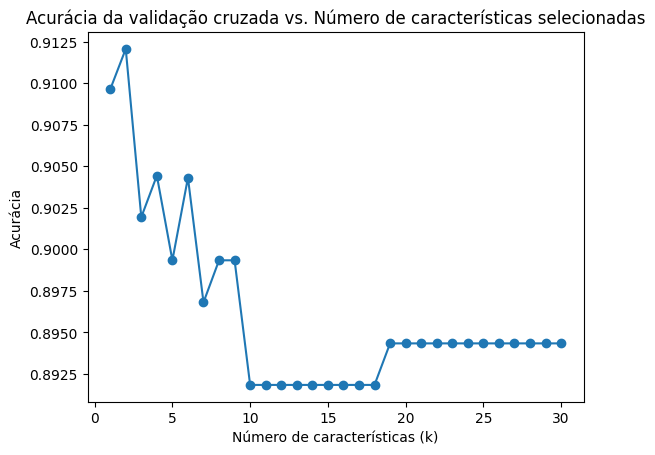

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.91      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

Índices das características selecionadas:
[ 7 27]
Nomes das características selecionadas:
['mean concave points' 'worst concave points']


Modelo: Random Forest Classifier
O melhor valor de k é: 27


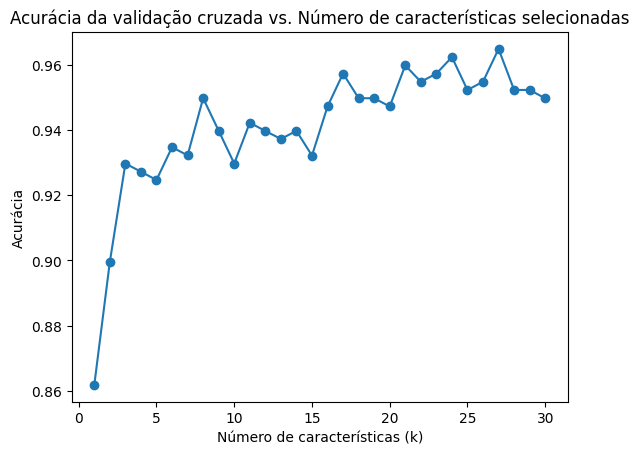

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Índices das características selecionadas:
[ 0  1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 27 28 29]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'fractal dimension error' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst compactness' 'worst concavity' 'worst concave points'
 'worst 

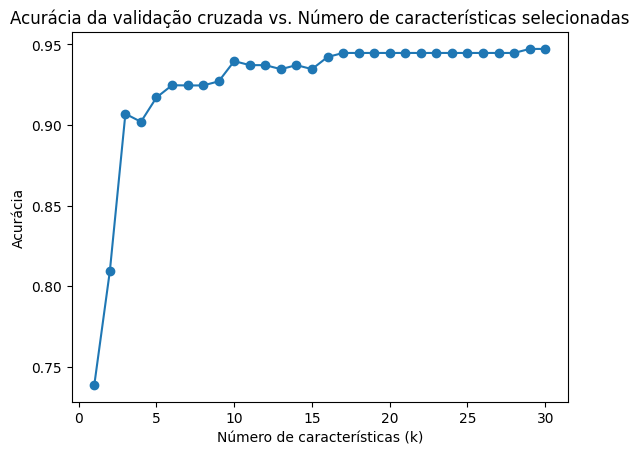

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Índices das características selecionadas:
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'perimeter error' 'area error' 'smoothness error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 

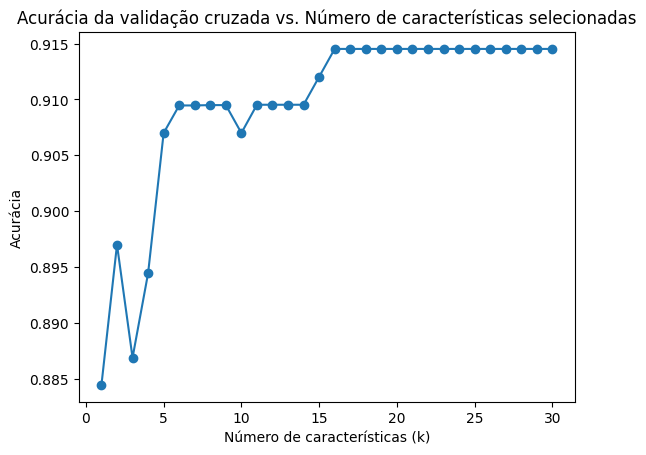

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Índices das características selecionadas:
[ 0  2  3  5  6  7 10 12 13 20 21 22 23 25 26 27]
Nomes das características selecionadas:
['mean radius' 'mean perimeter' 'mean area' 'mean compactness'
 'mean concavity' 'mean concave points' 'radius error' 'perimeter error'
 'area error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst compactness' 'worst concavity' 'worst concave points']


Modelo: AdaBoost Classifier
O melhor valor de k é: 19


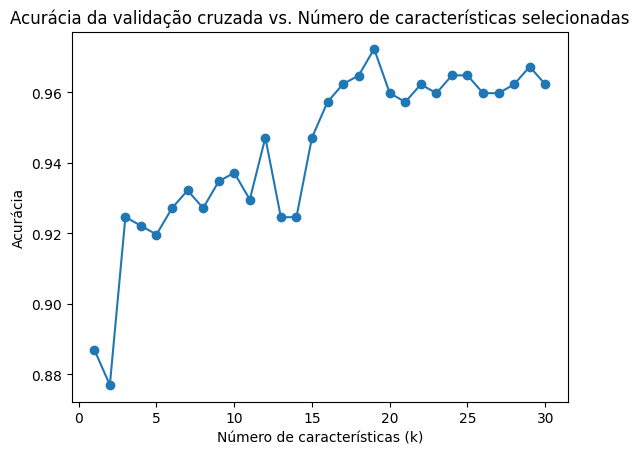

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Índices das características selecionadas:
[ 0  1  2  3  5  6  7 10 12 13 20 21 22 23 24 25 26 27 28]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'radius error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']


Modelo: Gradient Boosting Classifier
O melhor valor de k é: 26


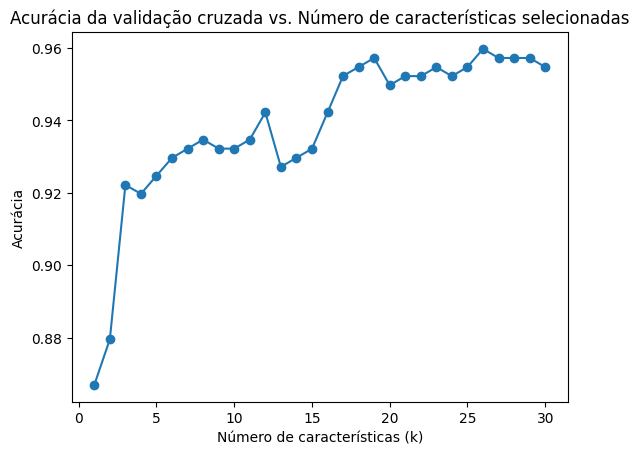

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Índices das características selecionadas:
[ 0  1  2  3  4  5  6  7  8 10 12 13 15 16 17 19 20 21 22 23 24 25 26 27
 28 29]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'compactness error' 'concavity error' 'concave points error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry'
 'worst fract

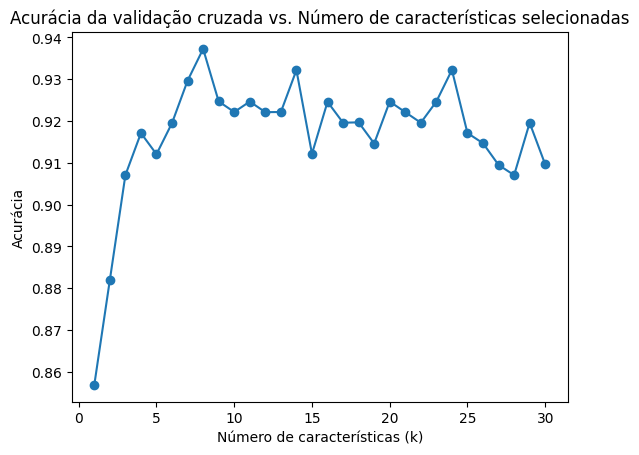

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        63
           1       0.93      0.93      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

Índices das características selecionadas:
[ 0  2  6  7 20 22 23 27]
Nomes das características selecionadas:
['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points'
 'worst radius' 'worst perimeter' 'worst area' 'worst concave points']


Modelo: Extra Trees Classifier
O melhor valor de k é: 26


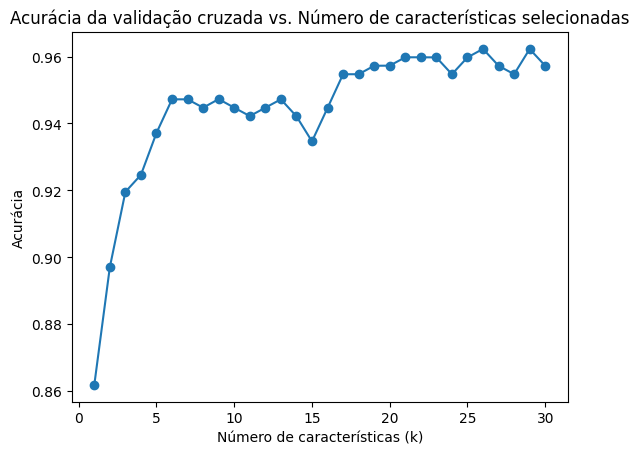

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Índices das características selecionadas:
[ 0  1  2  3  4  5  6  7  8 10 12 13 15 16 17 19 20 21 22 23 24 25 26 27
 28 29]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'compactness error' 'concavity error' 'concave points error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry'
 'worst fract

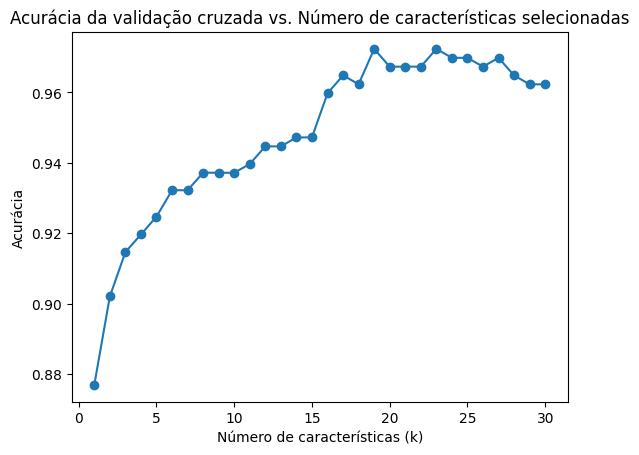

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Índices das características selecionadas:
[ 0  1  2  3  5  6  7 10 12 13 20 21 22 23 24 25 26 27 28]
Nomes das características selecionadas:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'mean concave points' 'radius error'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst smoothness' 'worst compactness'
 'worst concavity' 'worst concave points' 'worst symmetry']


Melhor Modelo: Logistic Regression com pontuação: 28


In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

# Carregue o conjunto de dados Breast Cancer
data = load_breast_cancer()

# Crie os modelos
models = {
    "SVC (kernel='linear')": SVC(kernel='linear', random_state=42),
    "SVC (kernel='rbf')": SVC(kernel='rbf', random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

best_model_name = None
best_score = -1

# Avalie os modelos usando a função e encontre o melhor modelo
for model_name, model in models.items():
    print(f"Modelo: {model_name}")
    score = evaluate_model(model, data)
    
    if score > best_score:
        best_score = score
        best_model_name = model_name
    print("\n")

print(f"Melhor Modelo: {best_model_name} com pontuação: {best_score}")


In [10]:
best

NameError: name 'best' is not defined